In [1]:
from pyfile import eval, eq
from discopy.quantum.zx import Spider, Id
from spiders import W, Z, Swap, H, CZ

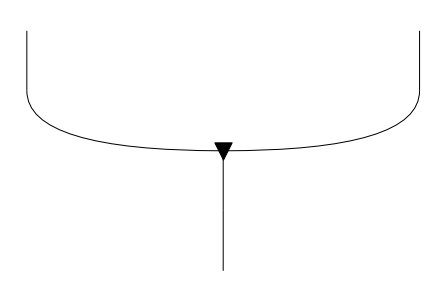

In [2]:
W(2, False).draw()

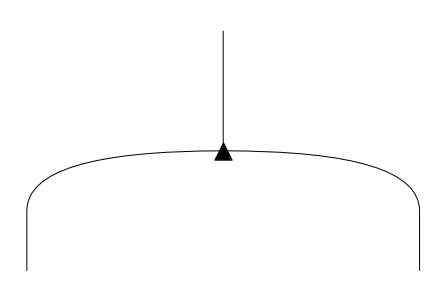

(2, 1)

In [3]:
cw = W(2, False)
w = cw.T()
w.draw()
len(cw.dom), len(cw.cod)

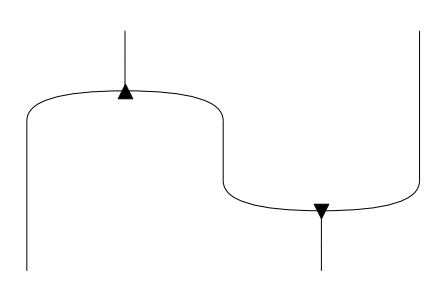

<ipython-input-18-0b45540f8038>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  eval(z).astype(float)


array([[1., 0., 0., 0.],
       [0., 1., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [18]:
z = w @ Id(1) >> Id(1) @ cw
z.draw()
eval(z).astype(float)

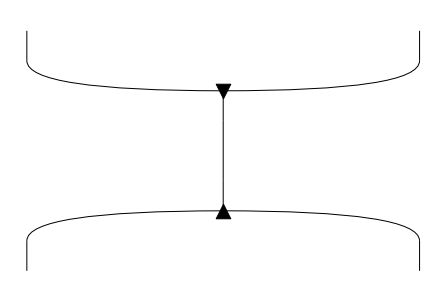

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [5]:
z2 = cw >> w
z2.draw()
eval(z2)

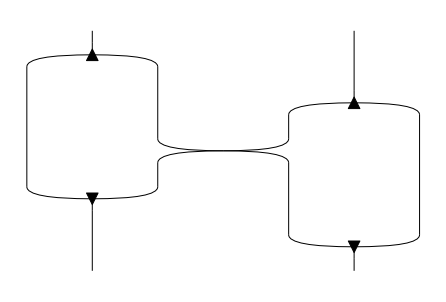

array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 2.+0.j]])

In [6]:
z22 = w @ w >> Id(1) @ Swap @ Id(1) >> cw @ cw
z22.draw()
eval(z22)

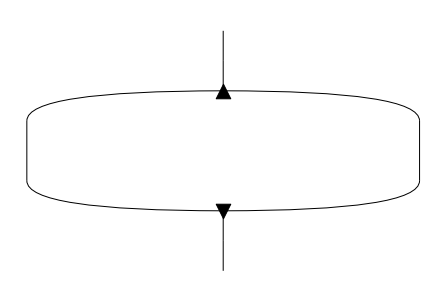

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 2.+0.j]])

In [7]:
d = W() >> W().T()
d.draw()
eval(d)

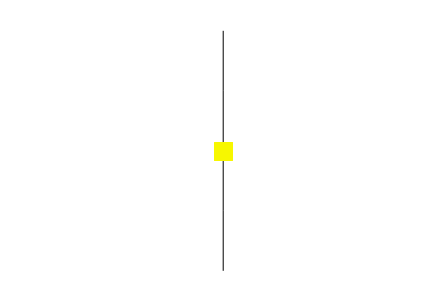

In [8]:

(H >> Id(1)).draw()

In [9]:
eval(H)

array([[ 1.+0.j,  1.+0.j],
       [ 1.+0.j, -1.+0.j]])

In [10]:
H.dom, H.cod

(PRO(1), PRO(1))

In [11]:
Id(1).dom, Id(1).cod

(PRO(1), PRO(1))

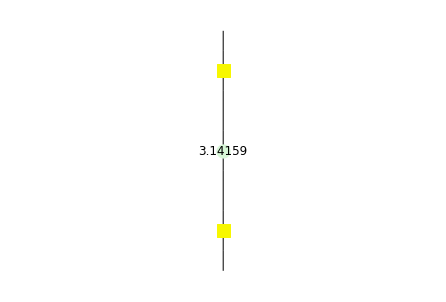

<ipython-input-12-43313ece263e>:3: ComplexWarning: Casting complex values to real discards the imaginary part
  eval(a).astype(float)


array([[3.52073926e-12, 2.00000000e+00],
       [2.00000000e+00, 3.52073926e-12]])

In [12]:
a = H >> Z(1, 1, 3.14159) >> H
a.draw()
eval(a).astype(float)

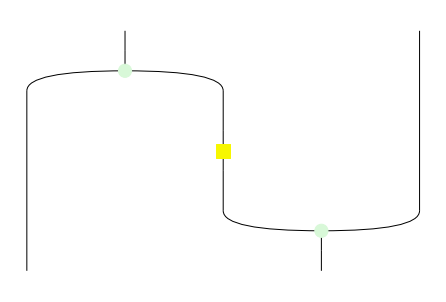

<ipython-input-13-350cfb58d239>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  eval(CZ).astype(float)


array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0., -1.]])

In [13]:
CZ.draw()
eval(CZ).astype(float)

In [14]:
FSwap = Swap >> CZ
eq(FSwap, CZ >> Swap)

True

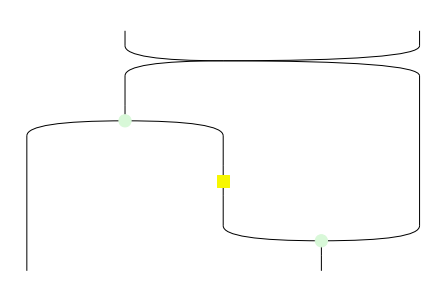

In [15]:
FSwap.draw()

In [16]:
eval(FSwap).astype(float)

<ipython-input-16-409645ae4a83>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  eval(FSwap).astype(float)


array([[ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  0., -1.]])

In [17]:
eval(FSwap >> FSwap).astype(float)

<ipython-input-17-e034ea1c2275>:1: ComplexWarning: Casting complex values to real discards the imaginary part
  eval(FSwap >> FSwap).astype(float)


array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])